In [7]:
import torch
import torchvision
from torchvision import transforms,datasets

train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

test =  datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)
X = torch.randn((28,28))
X = X.view(1,28*28)
output = net(X)
output

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


tensor([[-2.4998, -2.3364, -2.3406, -2.1377, -2.3505, -2.1723, -2.2943, -2.3373,
         -2.3163, -2.2855]], grad_fn=<LogSoftmaxBackward>)

In [9]:
import torch.optim as optim

# loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 3

for epoch in range(epochs):
    for data in trainset:
        X,y=data
#         print(X[0].shape)
#         print(y[0])
        net.zero_grad()
        output = net(X.view(-1,28*28 ))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1055, grad_fn=<NllLossBackward>)
tensor(0.0041, grad_fn=<NllLossBackward>)
tensor(0.1225, grad_fn=<NllLossBackward>)


In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.968


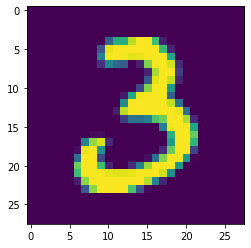

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()


In [12]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(3)
